In [35]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Customer Segmentation

This dataset was gotten from https://www.kaggle.com/datasets/ravalsmit/customer-segmentation-data 
It contains anonymized demographic, transactional, and behavioral attributes, allowing for detailed exploration of customer segments

## Loading the data

In [36]:
df = pd.read_csv('customer_segmentation_data.csv')
df.head(10)

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
5,60937,41,Female,Separated,Master's Degree,Uttar Pradesh,Nurse,87188,policy5,9/19/2020,Chat,policy1,570757,1106,Individual,Text,Text,Afternoon,English,Segment4
6,37676,55,Male,Single,Bachelor's Degree,Rajasthan,Manager,94891,policy3,07-04-2021,Chat,policy2,604069,3661,Group,In-Person Meeting,Text,Weekends,Mandarin,Segment5
7,54100,35,Male,Married,Master's Degree,Himachal Pradesh,Artist,61003,policy1,11-01-2021,Phone,policy3,418997,1148,Business,Email,Phone,Morning,English,Segment5
8,30476,43,Female,Single,Doctorate,Manipur,Salesperson,116249,policy1,9/20/2020,Mobile App,policy4,319423,2612,Business,In-Person Meeting,Text,Weekends,Mandarin,Segment2
9,39071,32,Female,Single,Master's Degree,Gujarat,Artist,49083,policy3,4/24/2020,Phone,policy1,701577,4595,Group,Phone,Email,Weekends,English,Segment2


## Understanding and Cleaning the Data

In [37]:
#identifying the columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

The dataset contains 20 columns and 53,503 rows. The purchase History column is defined as an object dtype so i will be converting it to a datetime dtype.

In [38]:
#converting Purchase History to datetime
#using format='mixed' because the dates are not in the same format
df['Purchase History'] = pd.to_datetime(df['Purchase History'], format='mixed')

In [39]:
#checking for missing values in the dataset
print(df.isna().sum())

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64


None of the columns in the dataset contain any missing values

In [40]:
#checking for duplicates in the dataset
df.duplicated().sum()

0

None of the columns in the dataset have any duplicate values

In [41]:
# getting a summary on the dataset
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Customer ID,53503.0,52265.204998,1.0,28950.5,55858.0,76096.0,100000.0,28165.000067
Age,53503.0,44.140945,18.0,32.0,43.0,57.0,70.0,15.079486
Income Level,53503.0,82768.324318,20001.0,51568.5,80719.0,115973.5,149999.0,36651.07567
Purchase History,53503,2021-01-01 14:46:59.415733760,2018-01-01 00:00:00,2019-07-10 00:00:00,2021-01-01 00:00:00,2022-06-28 00:00:00,2023-12-28 00:00:00,NaN
Coverage Amount,53503.0,492580.789638,50001.0,249613.5,477261.0,739124.0,1000000.0,268405.505571
Premium Amount,53503.0,3023.702447,500.0,1817.0,3194.0,4311.5,5000.0,1285.834295


From the above output the observation is:

    1. The dataset contains records from 1st January 2021 to 28th December 2023
    2. The minimum age is 18 while the maximum age is 70
    3. The lowest income is 20,001 while the highest income is 149,999
    4. The lowest Coverage Amount is 50,001 while the highest is 1,000,000
    5. The lowest Premium Amount is 500 while the highest is 5000
    

Outliers in the Income Levels column: 
0

Outliers in Unit Coverage Amount column
0

Outliers in Premium Amount column
0


<Axes: >

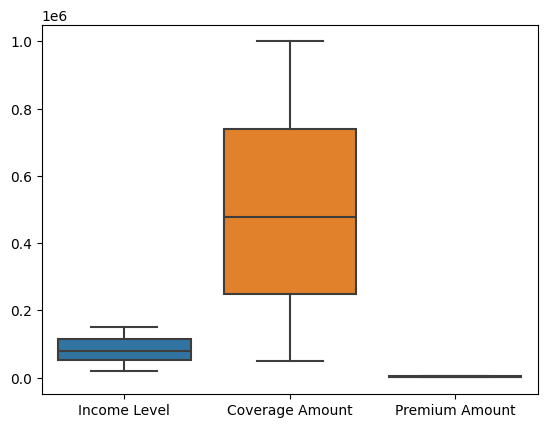

In [42]:
#checking for outliers using Z score
from scipy import stats

#calculating the zscore for numerical columns in the dataset
z_scores_income = stats.zscore(df['Income Level'])
z_scores_coverage = stats.zscore(df['Coverage Amount'])
z_scores_premium = stats.zscore(df['Premium Amount'])

#defining the threshold for outliers
threshold = 3

##identifying the outliers
outliers_income = z_scores_income > threshold
outliers_coverage = z_scores_coverage > threshold
outliers_premium = z_scores_premium > threshold

print("Outliers in the Income Levels column: ")
print(outliers_income.sum())
print("\nOutliers in Unit Coverage Amount column")
print(outliers_coverage.sum())
print("\nOutliers in Premium Amount column")
print(outliers_premium.sum())

#boxplot to visualize outliers
sns.boxplot(data=df[['Income Level', 'Coverage Amount', 'Premium Amount']])

## Exploratory Data Analysis

In [43]:
#creating a function for annotating plots
def annotate_bars(ax, size=12):
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), ',.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=size, xytext=(0, 8),
                    textcoords='offset points')

def annotate_barh(ax, size=12):
    for bar in ax.patches:
        ax.annotate(format(bar.get_width(), ',.0f'),
                    (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                    ha='left', va='center',
                    size=size, xytext=(8, 0),
                    textcoords='offset points')


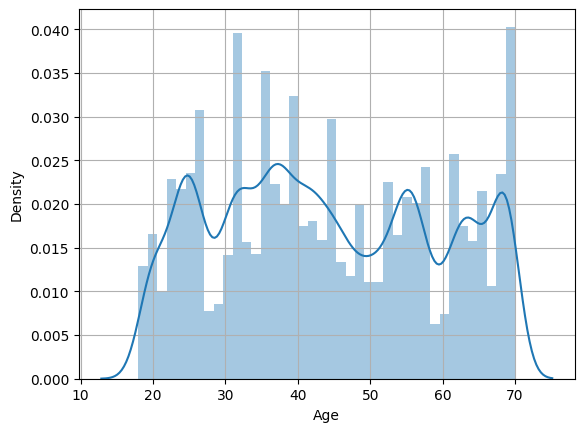

In [44]:
#visualizing the age distribution
sns.distplot(df['Age'])
plt.grid(True)

Majority of customers in the dataset are aged between 20years and 48 years

<Axes: xlabel='Income Level', ylabel='Density'>

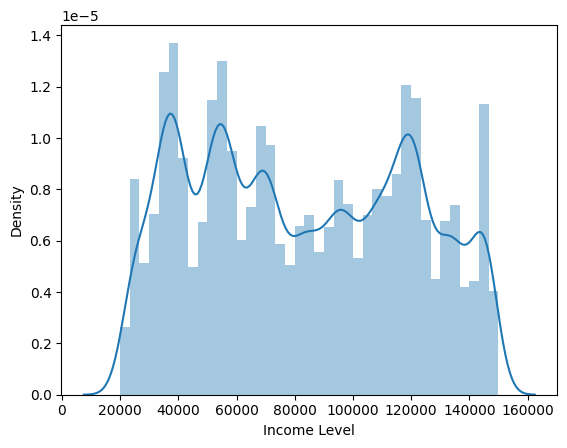

In [45]:
#visualizing income level distribution
sns.distplot(df['Income Level'])

<Axes: xlabel='Premium Amount', ylabel='Density'>

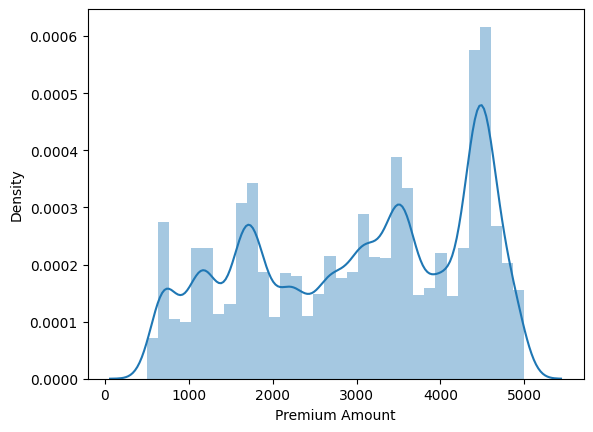

In [46]:
#visualizing the distribution of premium amount
sns.distplot(df['Premium Amount'])

<Axes: xlabel='Coverage Amount', ylabel='Density'>

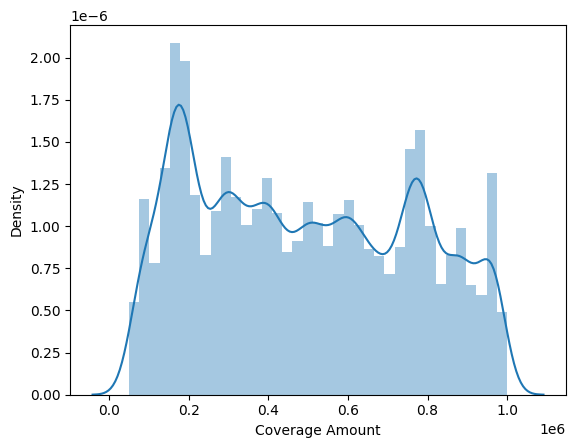

In [47]:
#visualizing the distribution of coverage amount
sns.distplot(df['Coverage Amount'])

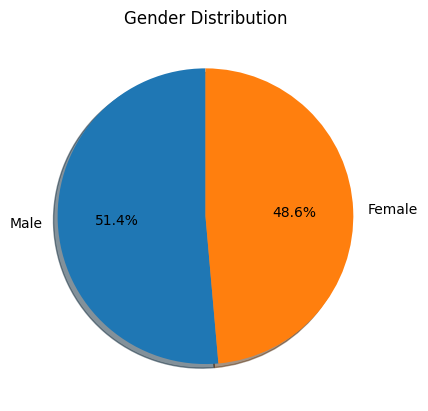

In [48]:
#visualizing customers by gender
gender_count = df['Gender'].value_counts()

#creating a pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', shadow=True, startangle=90 )
plt.title('Gender Distribution')
plt.show()


Men take up 51.4% of the customers in the dataset while Women take up 48.6%.

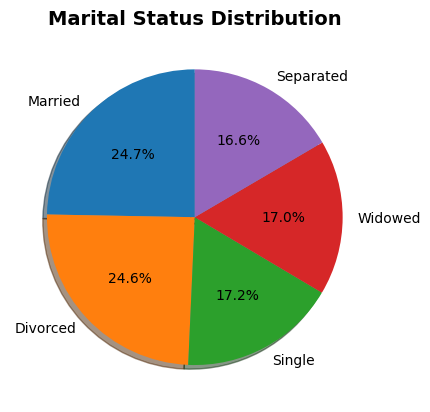

In [49]:
#visualizing customers by marital status
marital_status_count = df['Marital Status'].value_counts()

#creating a pie chart
plt.pie(marital_status_count, labels=marital_status_count.index, autopct='%1.1f%%', shadow=True, startangle=90 )
plt.title('Marital Status Distribution', fontweight='bold', fontsize=14)
plt.show()

there's really not a reason for there to be separate values for Divorced and separated customers, so i'll be replacing Separated with Divorced

In [50]:
#replacing all rows in the Marital Status  column with 'Separated' to 'Divorced'
df['Marital Status'] = df['Marital Status'].replace('Separated', 'Divorced')

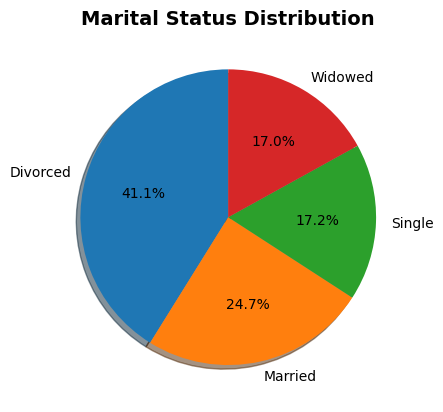

In [51]:
#visualizing customers by marital status
marital_status_count = df['Marital Status'].value_counts()

#creating a pie chart
plt.pie(marital_status_count, labels=marital_status_count.index, autopct='%1.1f%%', shadow=True, startangle=90 )
plt.title('Marital Status Distribution', fontweight='bold', fontsize=14)
plt.show()

We can observe that majority of customers in the dataset are Divorced followed by Married and Single people respectively, while Widowed customers take up the lowes population

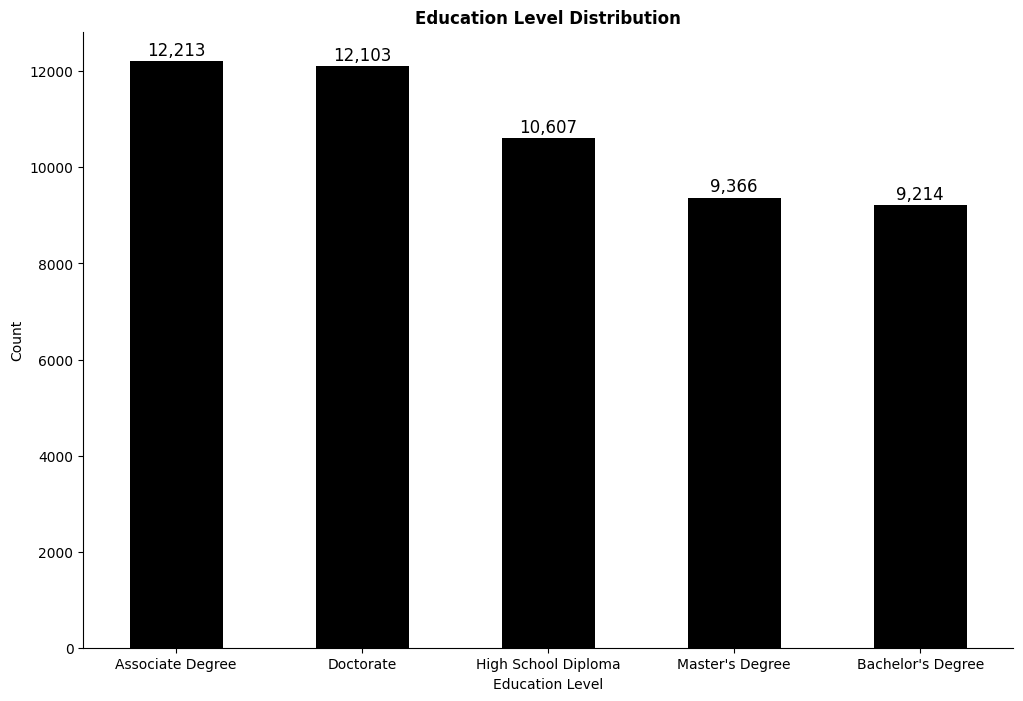

In [52]:
#visualizing the distribution of the education levels of customers in the dataset

#creating a bar chart of the education levels
plt.figure(figsize=(12, 8))
ax = df['Education Level'].value_counts().sort_values(ascending=False).plot(kind='bar', color='black')

#customizing the bar chart
ax.set_title('Education Level Distribution', fontweight='bold')
ax.set_xlabel('Education Level')
ax.set_ylabel('Count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=0)

#annotating the bar chart with the count of each education level
annotate_bars(ax)

plt.show()



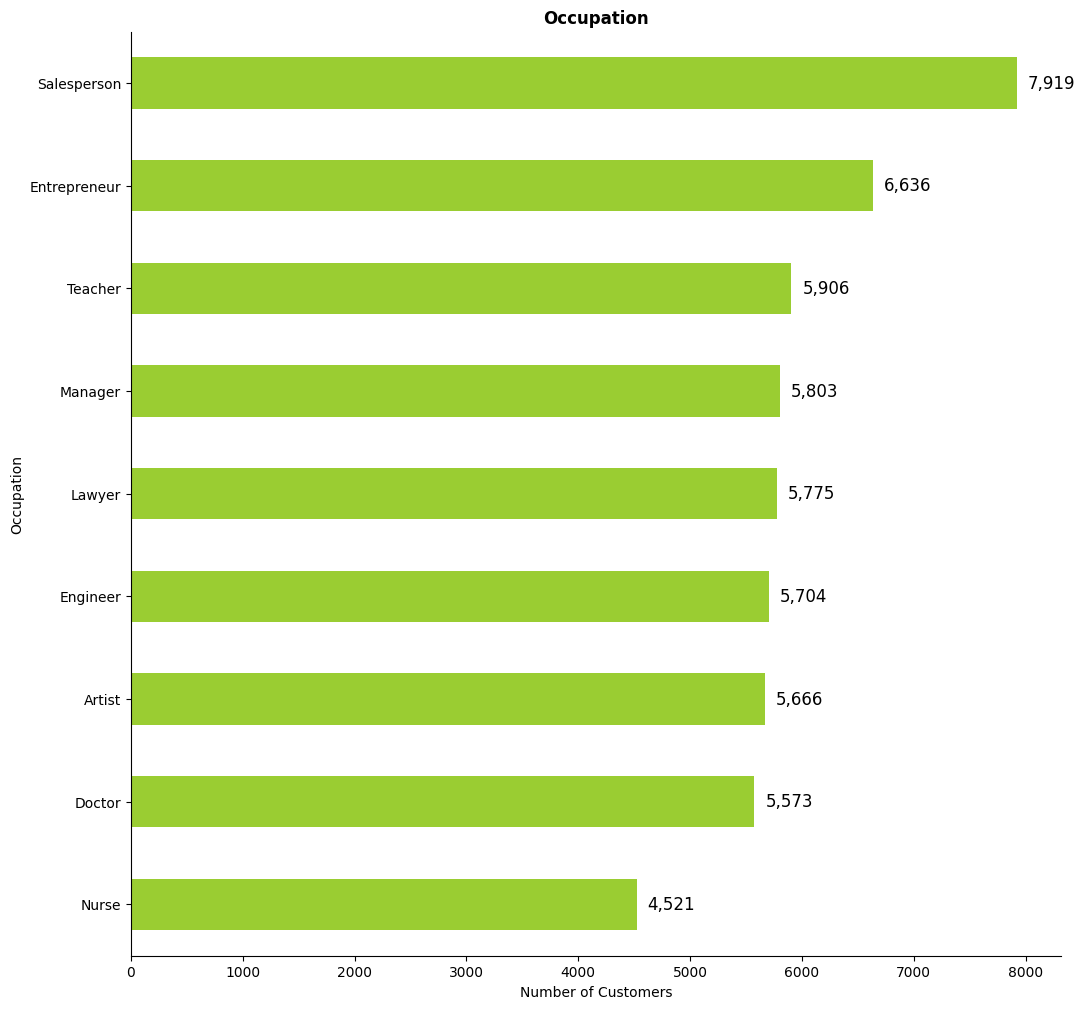

In [53]:
#visualizing different customer occupations
plt.figure(figsize=(12, 12))
ax = df['Occupation'].value_counts().sort_values(ascending=True).plot(kind='barh', color='yellowgreen')

#customizing the plot
ax.set_title('Occupation', fontweight='bold')
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Occupation')
plt.yticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

annotate_barh(ax)


plt.show()



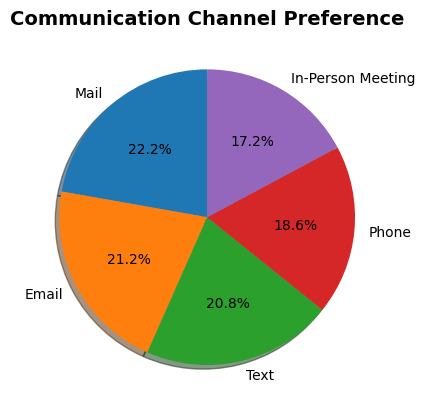

In [54]:
#visualizing customer communication channel preference
comm_preference = df['Customer Preferences'].value_counts()

#creating a pie chart
plt.pie(comm_preference, labels=comm_preference.index, autopct='%1.1f%%', shadow=True, startangle=90 )
plt.title('Communication Channel Preference', fontweight='bold', fontsize=14)
plt.show()


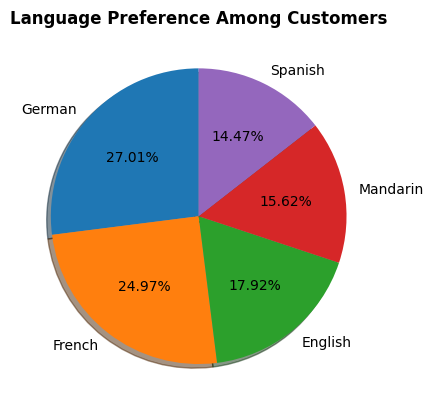

In [55]:
#visualizing language preference
lang_preference = df['Preferred Language'].value_counts()

#plotting a pie chart
plt.pie(lang_preference, labels=lang_preference.index, autopct='%1.2f%%',  shadow=True, startangle=90)
plt.title("Language Preference Among Customers", fontweight='bold')
plt.show()

In [60]:
# conducting ANOVA test
from scipy.stats import f_oneway
fstat, p_value = f_oneway(df[df['Gender']=='Male']['Income Level'], df[df['Gender']=='Female']['Income Level'])

print('F-statistic for Income Levels:', fstat)
print('p-value for Income Levels:', p_value)

fstat, p_value = f_oneway(df[df['Gender']=='Female']['Premium Amount'], df[df['Gender']=='Male']['Premium Amount'])

print('F-statistic for Premium Amount paid:', fstat)
print('p-value for Premium Amounts paid:', p_value)

fstat, p_value = f_oneway(df[df['Gender']=='Male']['Coverage Amount'], df[df['Gender']=='Female']['Coverage Amount'])

print('F-statistic for Coverage Amounts paid:', fstat)
print('p-value for Coverage Amounts paid:', p_value)

F-statistic for Income Levels: 5.200075298170656
p-value for Income Levels: 0.02258982491756503
F-statistic for Premium Amount paid: 48.40346595520189
p-value for Premium Amounts paid: 3.5092864394417805e-12
F-statistic for Coverage Amounts paid: 0.2664578119915919
p-value for Coverage Amounts paid: 0.605719994236428


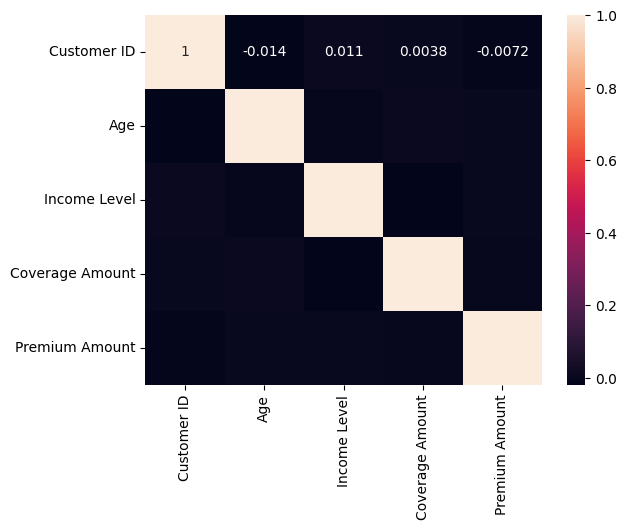

In [57]:
# plotting a heatmap for correlation analysis
# excludin non-numeric columns before computing correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# creaing heatmap for correlation analysis
sns.heatmap(correlation_matrix, annot=True)
plt.show()

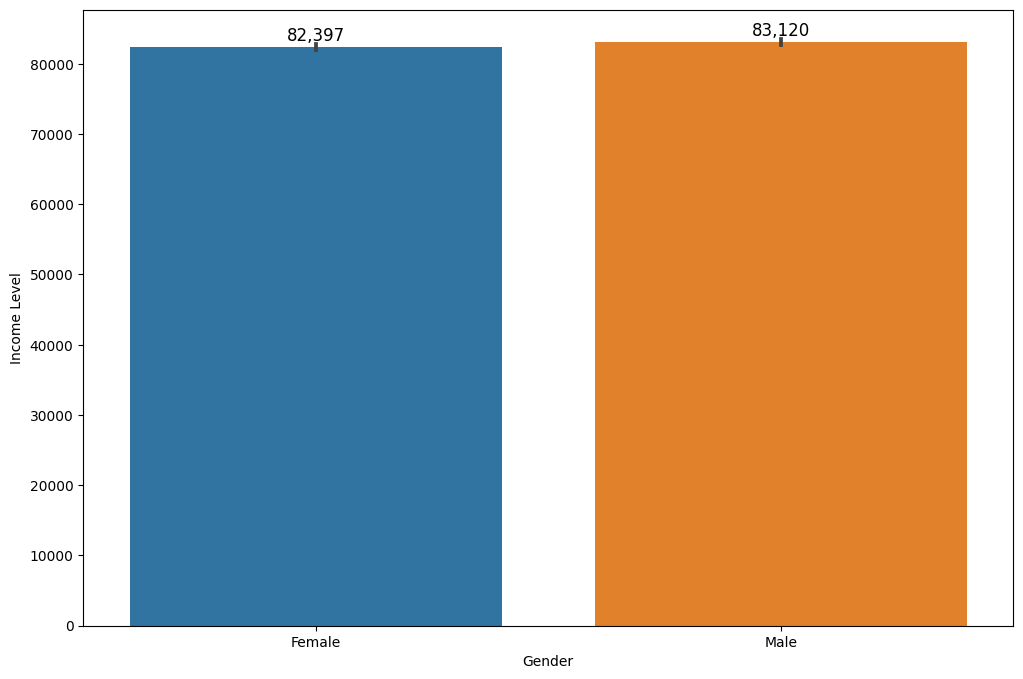

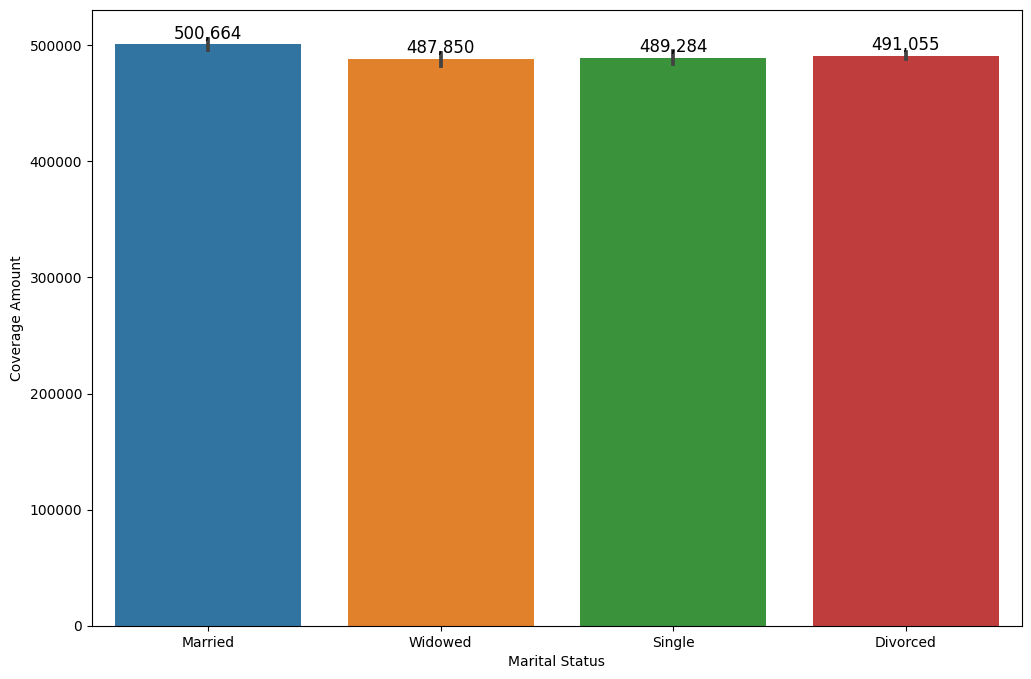

In [58]:
# plotting bar charts
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Gender', y='Income Level', data=df)
annotate_bars(ax)
plt.show()

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Marital Status', y='Coverage Amount', data=df)
annotate_bars(ax)
plt.show()

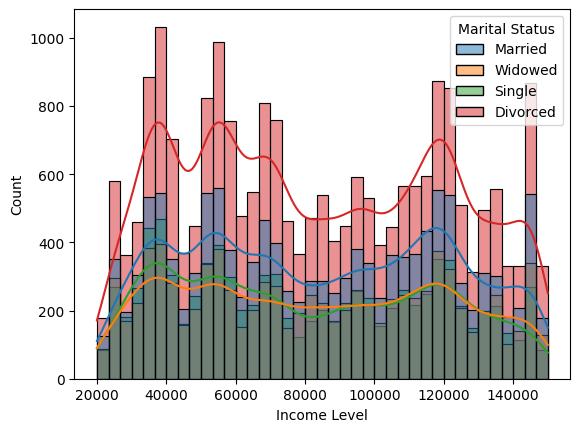

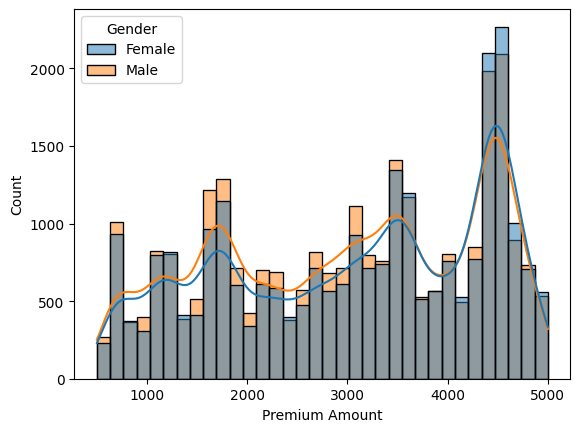

In [59]:
# plotting histograms
sns.histplot(x='Income Level', hue='Marital Status', data=df, kde=True)
plt.show()
sns.histplot(x='Premium Amount', hue='Gender', data=df, kde=True)
plt.show()